In [1]:
# Loading Libraries:
import pandas as pd
import numpy as np

In [2]:
# Loading the Data
titanic = pd.read_csv('https://raw.githubusercontent.com/dphi-official/First_ML_Model/master/titanic.csv')

In [3]:
# Let's examine our data
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
round(len(titanic[titanic['Survived']==1])/len(titanic), 2)

0.38

In [6]:
len(titanic[(titanic['Survived']==1) & (titanic['Embarked'] == 'S')])

217

In [7]:
titanic.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [8]:
# The whole goal is building a model that would predict the survival prabability of a person, given their basic features.

In [9]:
# Exploratory Data Analysis:
print('Total number of passangers in the training data...', len(titanic))
print('Number of passangers in the training data who survived...', len(titanic[titanic['Survived'] == 1]))

Total number of passangers in the training data... 891
Number of passangers in the training data who survived... 342


In [10]:
# Similarly, let's see what % of men and women who survived and then by the same token with class and age:
print('% of men who survived', 100*np.mean(titanic['Survived'][titanic['Sex'] == 'male']))
print('% of women who survived', 100*np.mean(titanic['Survived'][titanic['Sex'] == 'female']))

% of men who survived 18.890814558058924
% of women who survived 74.20382165605095


In [12]:
print('% of passangers who survived in first class', 100*np.mean(titanic['Survived'][titanic['Pclass'] == 1]))
print('% of passangers who survived in third class', 100*np.mean(titanic['Survived'][titanic['Pclass'] == 3]))

% of passangers who survived in first class 62.96296296296296
% of passangers who survived in third class 24.236252545824847


In [13]:
print('% of children who survived', 100*np.mean(titanic['Survived'][titanic['Age'] < 18]))
print('% of adults who survived', 100*np.mean(titanic['Survived'][titanic['Age'] > 18]))

% of children who survived 53.98230088495575
% of adults who survived 38.26086956521739


In [14]:
# Data Preprocessing:
# Non numeric features to numeric:
# We are going to use a decision tree model. The model requires only numeric values, but one of our features is categorical: "female" or "male". 
# this can easily be fixed by encoding this feature: "male" = 1, "female" = 0

In [15]:
titanic['Sex'] = titanic['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [16]:
# Missing Values:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
titanic['Age'] = titanic['Age'].fillna(np.mean(titanic['Age']))

In [18]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
# Looking at frequency of each values in 'Embarked'
titanic.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [20]:
# Filling missing values of a categorical variable with 'mode'
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0,B28,NaN


In [21]:
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

C:\Users\sadda\AppData\Local\Temp\ipykernel_10848\565283480.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)


In [22]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [24]:
# Omit irrelevant columns:
titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

In [25]:
# Separating input variables(X) and target variable (y)
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

In [26]:
# Train and Test Split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
# Building our Model:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
# Evaluate the model:
from sklearn.metrics import accuracy_score
print('Training accuracy...', accuracy_score(y_train, model.predict(X_train)))
print('Test accuracy...', accuracy_score(y_test, model.predict(X_test)))

Training accuracy... 0.9798657718120806
Test accuracy... 0.7457627118644068


In [30]:
# It is clear once we plot the tree. the next bulk of code would not be explained and can be regarded as a useful magic that plots decision trees.

In [31]:
from sklearn.tree import export_graphviz
import graphviz

In [32]:
dot_data = export_graphviz(model, out_file=None,
                          feature_names=X_test.columns,
                          class_names = ['0','1'],
                          filled=True, rounded=True,
                          special_characters=True)

In [33]:
graph1 = graphviz.Source(dot_data)

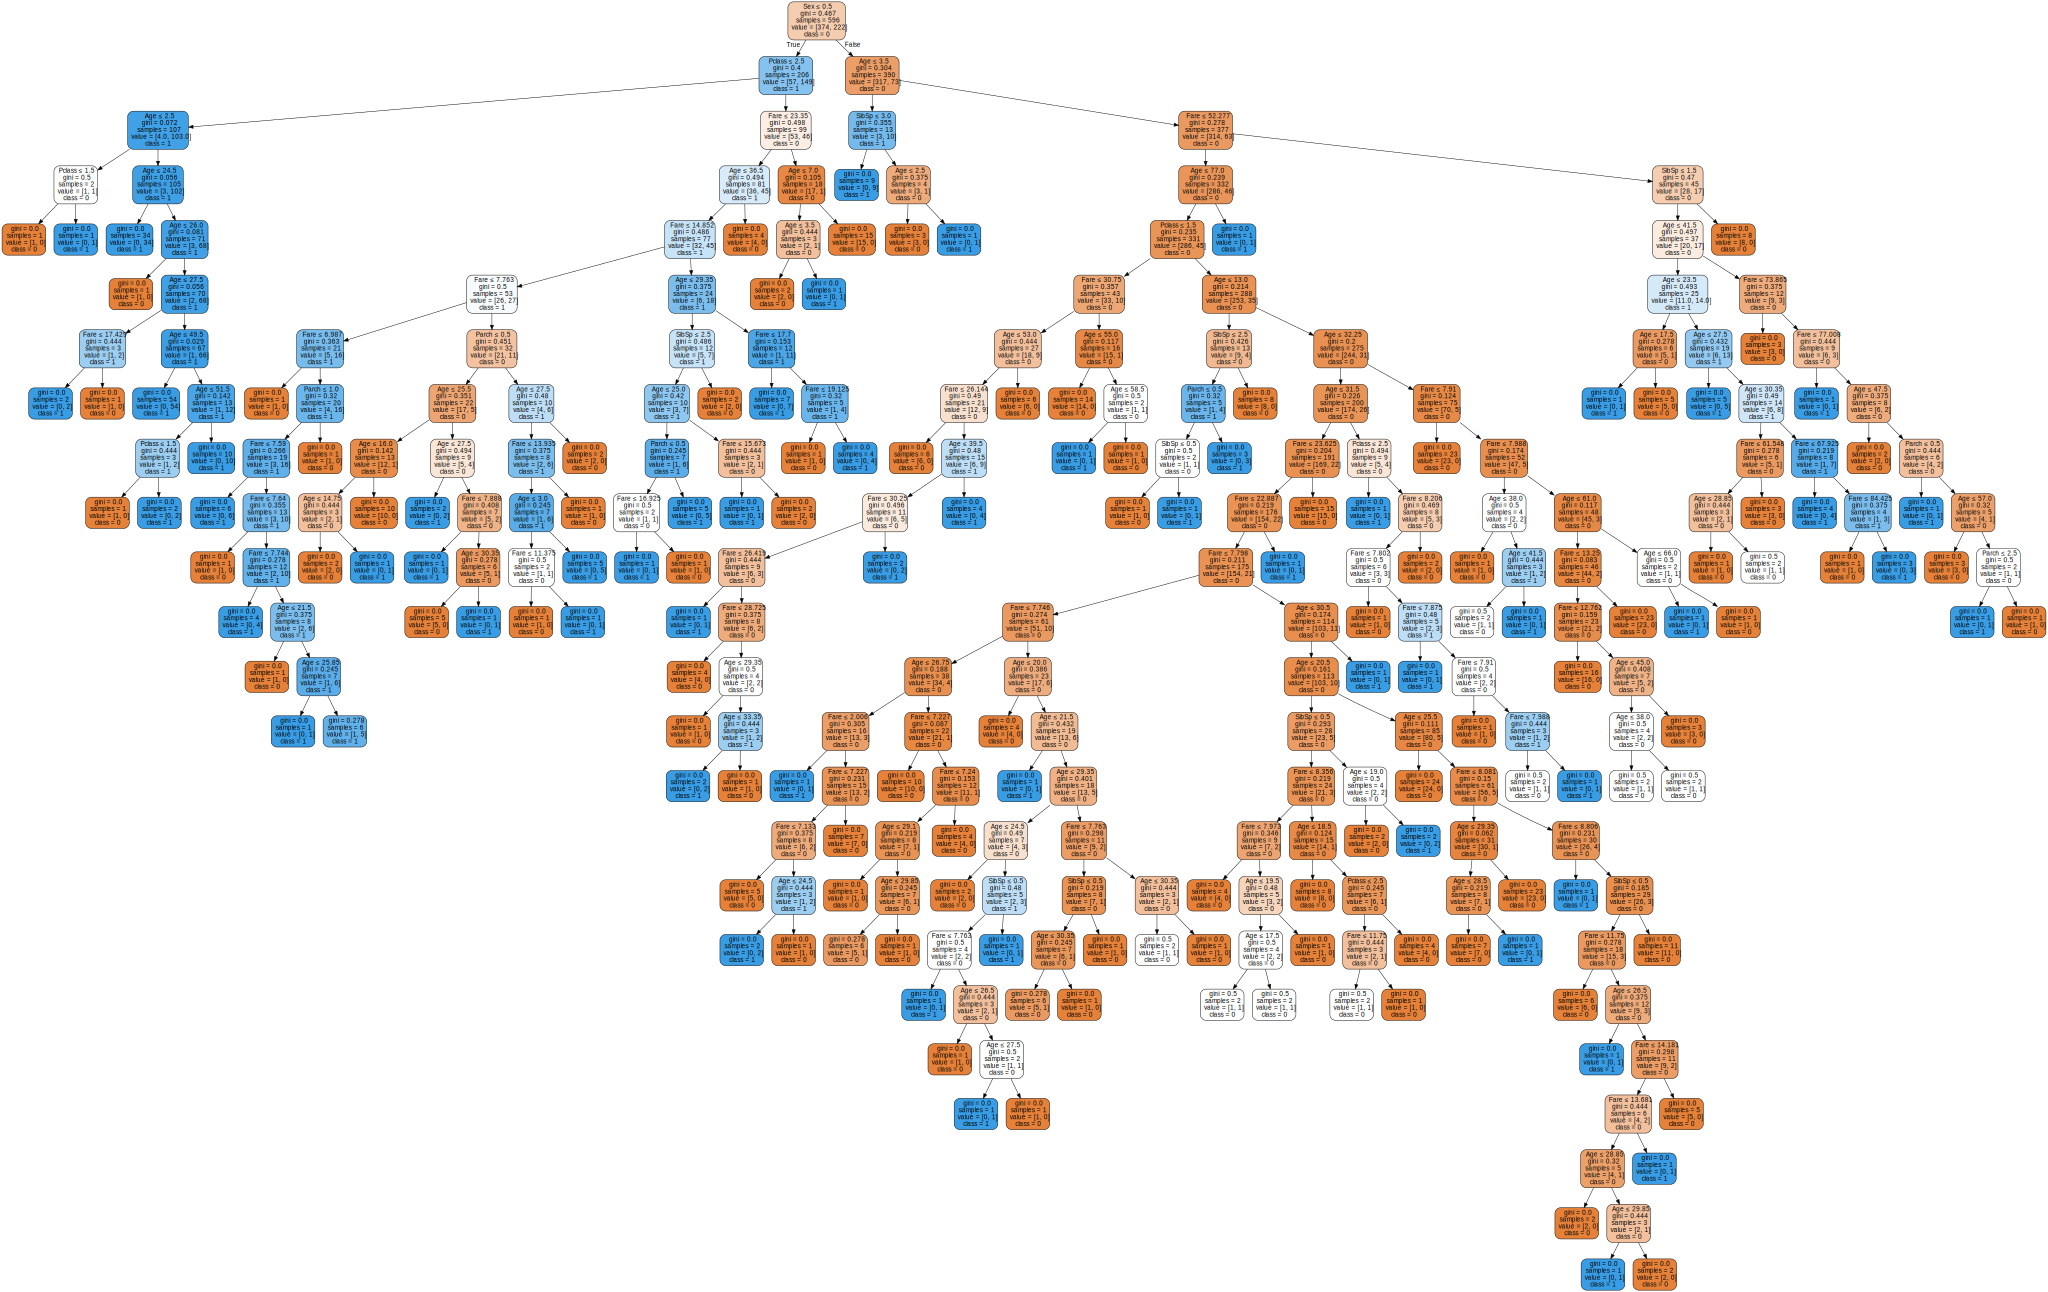

In [34]:
graph1

In [35]:
# Improve the model:
# We can reduce overfitting by limiting the number of "questions" that the model is allowed to ask. as each node in the tree is a question, 
# by limiting the depth of the tree we can limit the number of questions. So let us again create an instance of a decision tree,
# but this one cannot produce trees deeper than 3 (3 questions):

In [36]:
model_improved = DecisionTreeClassifier(max_depth=3)
model_improved.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [37]:
print('train score...', accuracy_score(y_train, model_improved.predict(X_train)))
print('test score...', accuracy_score(y_test, model_improved.predict(X_test)))

train score... 0.8238255033557047
test score... 0.8203389830508474


In [38]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(model_improved, X_train, y_train, cv=10, scoring='accuracy')
print('Avarage train score...', cv_score.mean())
print('Std train score...', cv_score.std())

Avarage train score... 0.8171751412429378
Std train score... 0.07624102772646354


In [39]:
cv_score

array([0.66666667, 0.83333333, 0.91666667, 0.91666667, 0.76666667,
       0.76666667, 0.83050847, 0.84745763, 0.74576271, 0.88135593])

In [41]:
from sklearn.model_selection import cross_val_score
for depth in range(2, 6):
    print('With depth:', depth)
    cv_score = cross_val_score(DecisionTreeClassifier(max_depth = depth, max_features = None),
                              X_train, y_train, cv=10, scoring='accuracy')
    print(' Avarage train score...', cv_score.mean())
    print(' Std train score...', cv_score.mean())

With depth: 2
 Avarage train score... 0.8036158192090396
 Std train score... 0.8036158192090396
With depth: 3
 Avarage train score... 0.8171751412429378
 Std train score... 0.8171751412429378
With depth: 4
 Avarage train score... 0.7903389830508475
 Std train score... 0.7903389830508475
With depth: 5
 Avarage train score... 0.7936158192090396
 Std train score... 0.7936158192090396


In [42]:
# Let's visualize the tree again using the same code from above:
dot_data = export_graphviz(model_improved, out_file=None, impurity=False,
                          feature_names = X_test.columns,
                          class_names = ['0', '1'],
                          filled=True, rounded=True)

In [43]:
graph2 = graphviz.Source(dot_data)

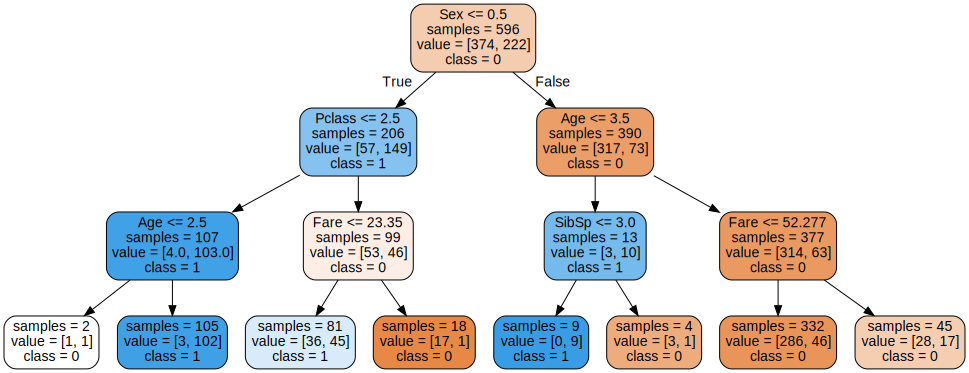

In [44]:
graph2

In [45]:
# Optimisation:
# GridSearchCV with Decision Tree Classifier

In [46]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [i for i in range(2, 6)],
             'criterion': ['gini', 'entropy'],
             'max_features': ['auto', 'sqrt', 'loge2', None]}

clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, verbose=2, scoring='accuracy')
clf.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max

C:\Users\sadda\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
160 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sadda\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sadda\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\sadda\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\sadda\anaconda3\Lib\site-package

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'loge2', None]},
             scoring='accuracy', verbose=2)

In [48]:
print('Best Hyperparameters:', clf.best_params_)
print('Score:', clf.best_score_)
print('train score...', accuracy_score(y_train, clf.predict(X_train)))
print('test score...', accuracy_score(y_test, clf.predict(X_test)))

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': None}
Score: 0.8188418079096044
train score... 0.8238255033557047
test score... 0.8203389830508474
